In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df= pd.read_csv("iris.csv")

In [ ]:
df.head()

,Sepal-length,Sepal-width,Petal-length,Petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Sepal-length,Sepal-width,Petal-length,Petal-width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal-length  150 non-null    float64
 1   Sepal-width   150 non-null    float64
 2   Petal-length  150 non-null    float64
 3   Petal-width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

,0
Sepal-length,0
Sepal-width,0
Petal-length,0
Petal-width,0
Species,0


In [ ]:
df.columns

Index(['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width',
       'Species'],
      dtype='object')

In [13]:
iris =load_iris()
X = iris.data
Y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species']=Y
df['species_name'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})

In [ ]:
df.head()

In [ ]:
df[iris.feature_names].hist(bins=15, figsize=(12,8),edgecolor='black')
plt.suptitle("Feature Distributions (Histograms)")
plt.tight_layout()
plt.show()

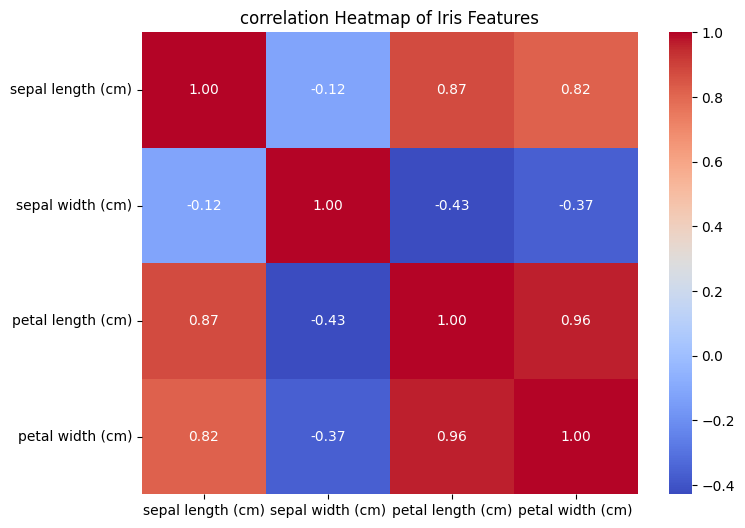

In [16]:
plt.figure(figsize=(8,6))
corr =df[iris.feature_names].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm",fmt=".2f")
plt.title("correlation Heatmap of Iris Features")
plt.show()

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y ,test_size=0.3, random_state=42)

In [19]:
model =LogisticRegression(max_iter=200)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [21]:
Y_pred =model.predict(X_test)

In [22]:
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Classification_report:\n",classification_report(Y_test,Y_pred))

Accuracy: 1.0
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



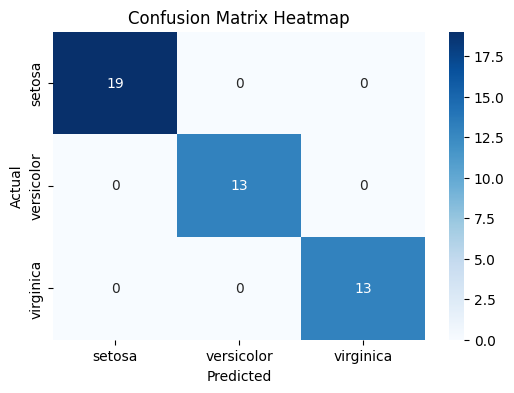

In [24]:
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

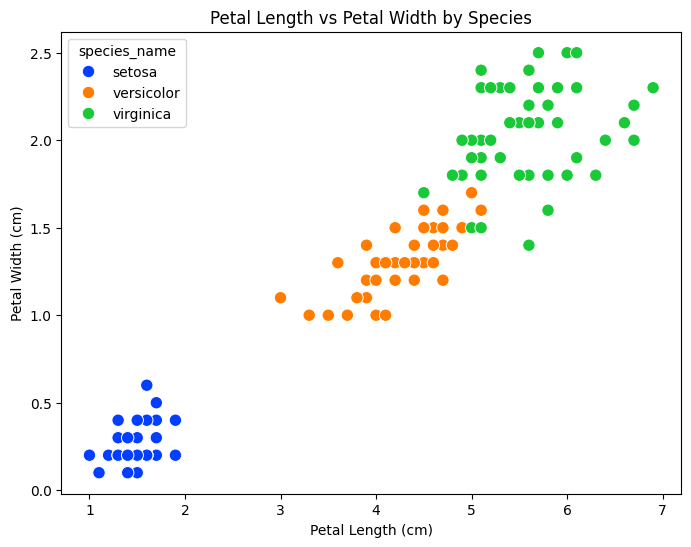

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["petal length (cm)"],
    y=df["petal width (cm)"],
    hue=df["species_name"],
    palette="bright",
    s=80
)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Petal Width by Species")
plt.show()

In [26]:
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # example: small sepal, small petal
pred = model.predict(sample)
print("Predicted species for sample", sample, ":", iris.target_names[pred][0])

Predicted species for sample [[5.1 3.5 1.4 0.2]] : setosa


# New Section